## Trying out Open Street Map with Transit and Grocery Stores
### Carolyn Pugh

#### Import Libraries

In [30]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

#### Start Plotting Downtown LA

In [31]:
address = 'Downtown, Los Angeles, CA'

In [107]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM that are tagged as 'building' for a 1000m X 1000m square area
osm = ox.geometries_from_address(address,tags={'public_transport':True},dist=3000)

CPU times: user 290 ms, sys: 16.9 ms, total: 307 ms
Wall time: 3.98 s


In [108]:
#how big is the dataframe
osm.shape

(1004, 76)

In [109]:
# show me 10 random rows
osm.sample(10)

name             network  \
element_type osmid                                                         
node         9602031842              Olympic & Grand         Metro Local   
             10248287418                 1st & Boyle         Metro Local   
             268371846               Pershing Square              LACMTA   
             4263171791               Main & College         Metro Local   
             9933926697               Central & 14th         Metro Local   
             9571518440                   3rd & Loma    Metro Local;DASH   
             4296601190                 Spring & 9th  Metro Local;GTrans   
             9566703992             Olympic & Blaine         Metro Local   
             9567344416                  7th & Lucas    Metro Local;DASH   
             9681745644   Spring Street & 1st Street         Metro Local   

                                                                   operator  \
element_type osmid                                                            
node         9602031842   Los Angeles County Metropolitan Transportation...   
             10248287418  Los Angeles County Metropolitan Transportation...   
             268371846    Los Angeles County Metropolitan Transportation...   
             4263171791   Los Angeles County Metropolitan Transportation...   
             9933926697   Los Angeles County Metropolitan Transportation...   
             9571518440   Los Angeles County Metropolitan Transportation...   
             4296601190   Los Angeles County Metropolitan Transportation...   
             9566703992   Los Angeles County Metropolitan Transportation...   
             9567344416   Los Angeles County Metropolitan Transportation...   
             9681745644   Los Angeles County Metropolitan Transportation...   

                         public_transport  railway subway  \
element_type osmid                                          
node         9602031842          platform      NaN    NaN   
             10248287418         platform      NaN    NaN   
             268371846            station  station    yes   
             4263171791          platform      NaN    NaN   
             9933926697          platform      NaN    NaN   
             9571518440          platform      NaN    NaN   
             4296601190          platform      NaN    NaN   
             9566703992          platform      NaN    NaN   
             9567344416          platform      NaN    NaN   
             9681745644          platform      NaN    NaN   

                                             geometry station wheelchair  \
element_type osmid                                                         
node         9602031842   POINT (-118.26094 34.04333)     NaN        NaN   
             10248287418  POINT (-118.22011 34.04715)     NaN        NaN   
             268371846    POINT (-118.25101 34.04963)  subway        yes   
             4263171791   POINT (-118.23381 34.06290)     NaN        NaN   
             9933926697   POINT (-118.24688 34.02828)     NaN        NaN   
             9571518440   POINT (-118.26534 34.05990)     NaN        NaN   
             4296601190   POINT (-118.25428 34.04255)     NaN        NaN   
             9566703992   POINT (-118.27032 34.04731)     NaN        NaN   
             9567344416   POINT (-118.26554 34.05146)     NaN        NaN   
             9681745644   POINT (-118.24376 34.05388)     NaN        NaN   

                          wikidata  ...  ele height lacounty:ain  \
element_type osmid                  ...                            
node         9602031842        NaN  ...  NaN    NaN          NaN   
             10248287418       NaN  ...  NaN    NaN          NaN   
             268371846    Q5919683  ...  NaN    NaN          NaN   
             4263171791        NaN  ...  NaN    NaN          NaN   
             9933926697        NaN  ...  NaN    NaN          NaN   
             9571518440        NaN  ...  NaN    NaN          NaN

In [110]:
#see column names
osm.columns.tolist()

['name',
 'network',
 'operator',
 'public_transport',
 'railway',
 'subway',
 'geometry',
 'station',
 'wheelchair',
 'wikidata',
 'light_rail',
 'location',
 'local_ref',
 'railway:position',
 'railway:ref',
 'train',
 'source',
 'addr:state',
 'name:de',
 'name:en',
 'platforms',
 'toilets:wheelchair',
 'wikipedia',
 'bus',
 'highway',
 'network:wikidata',
 'network:wikipedia',
 'route_ref',
 'shelter',
 'note',
 'amenity',
 'ref',
 'source_ref',
 'bench',
 'operator:wikidata',
 'operator:wikipedia',
 'not:network:wikidata',
 'towards',
 'description',
 'operator:short',
 'network:short',
 'fixme',
 'route',
 'alt_name',
 'aerialway',
 'aerialway:access',
 'aerialway:summer:access',
 'addr:city',
 'addr:housenumber',
 'addr:postcode',
 'addr:street',
 'bin',
 'tactile_paving',
 'website',
 'level',
 'brand',
 'brand:wikidata',
 'lit',
 'layer',
 'nodes',
 'area',
 'surface',
 'covered',
 'tunnel',
 'bridge',
 'building',
 'ele',
 'height',
 'lacounty:ain',
 'lacounty:bld_id',
 'star

In [111]:
## subset it to keep only desired columns
columns_to_keep = ['geometry','name','network','railway','subway', 'station', 'light_rail', 'location','bench','bus','highway', 'shelter', 'wheelchair','covered']
osm = osm[columns_to_keep]
#display subsetted dataframe
osm.head(10)

geometry  \
element_type osmid                                    
node         268371843  POINT (-118.24660 34.05445)   
             268371846  POINT (-118.25101 34.04963)   
             268372325  POINT (-118.25874 34.04866)   
             268546851  POINT (-118.23419 34.05434)   
             268546861  POINT (-118.23438 34.05434)   
             268546876  POINT (-118.23457 34.05438)   
             268546882  POINT (-118.23467 34.05438)   
             268546892  POINT (-118.23487 34.05435)   
             268547062  POINT (-118.23429 34.05586)   
             269607658  POINT (-118.22559 34.04758)   

                                             name           network  \
element_type osmid                                                    
node         268371843    Civic Center/Grand Park            LACMTA   
             268371846            Pershing Square            LACMTA   
             268372325    7th Street/Metro Center            LACMTA   
             268546851  Los Angeles Union Station  Amtrak;Metrolink   
             268546861  Los Angeles Union Station  Amtrak;Metrolink   
             268546876  Los Angeles Union Station  Amtrak;Metrolink   
             268546882  Los Angeles Union Station  Amtrak;Metrolink   
             268546892  Los Angeles Union Station  Amtrak;Metrolink   
             268547062  Los Angeles Union Station  Amtrak;Metrolink   
             269607658                 Pico/Aliso            LACMTA   

                            railway subway     station light_rail  \
element_type osmid                                                  
node         268371843         stop    yes         NaN        NaN   
             268371846      station    yes      subway        NaN   
             268372325      station    NaN  light_rail        yes   
             268546851  buffer_stop    NaN         NaN        NaN   
             268546861  buffer_stop    NaN         NaN        NaN   
             268546876  buffer_stop    NaN         NaN        NaN   
             268546882  buffer_stop    NaN         NaN        NaN   
             268546892  buffer_stop    NaN         NaN        NaN   
             268547062      station    NaN         NaN        NaN   
             269607658         stop    NaN         NaN        yes   

                           location bench  bus highway shelter wheelchair  \
element_type osmid                                                          
node         268371843          NaN   NaN  NaN     NaN     NaN        NaN   
             268371846          NaN   NaN  NaN     NaN     NaN        yes   
             268372325  underground   NaN  NaN     NaN     NaN        NaN   
             268546851          NaN   NaN  NaN     NaN     NaN        NaN   
             268546861          NaN   NaN  NaN     NaN     NaN        NaN   
             268546876          NaN   NaN  NaN     NaN     NaN        NaN   
             268546882          NaN   NaN  NaN     NaN     NaN        NaN   
             268546892          NaN   NaN  NaN     NaN     NaN        NaN   
             268547062          NaN   NaN  NaN     NaN     NaN        yes   
             269607658          NaN   NaN  NaN     NaN     NaN        NaN   

                       covered  
element_type osmid              
node         268371843     NaN  
             268371846     NaN  
             268372325     NaN  
             268546851     NaN  
             268546861     NaN  
             268546876     NaN  
             268546882     NaN  
             268546892     NaN  
             268547062     NaN  
             269607658     NaN

<AxesSubplot: >

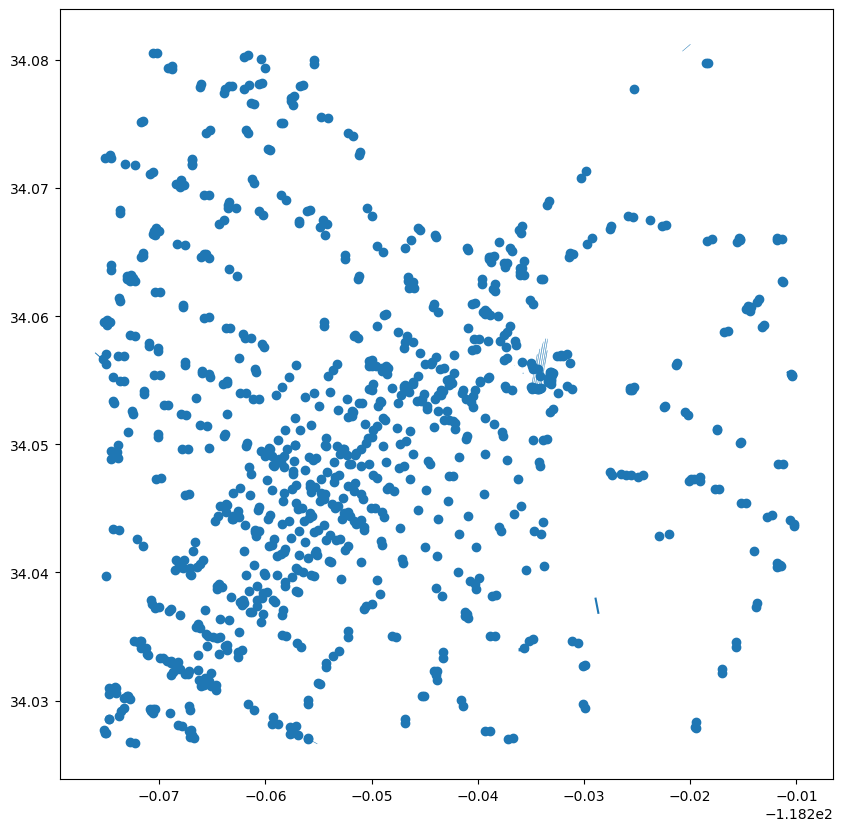

In [112]:
# plot entire dataset
osm.plot(figsize=(10,10))

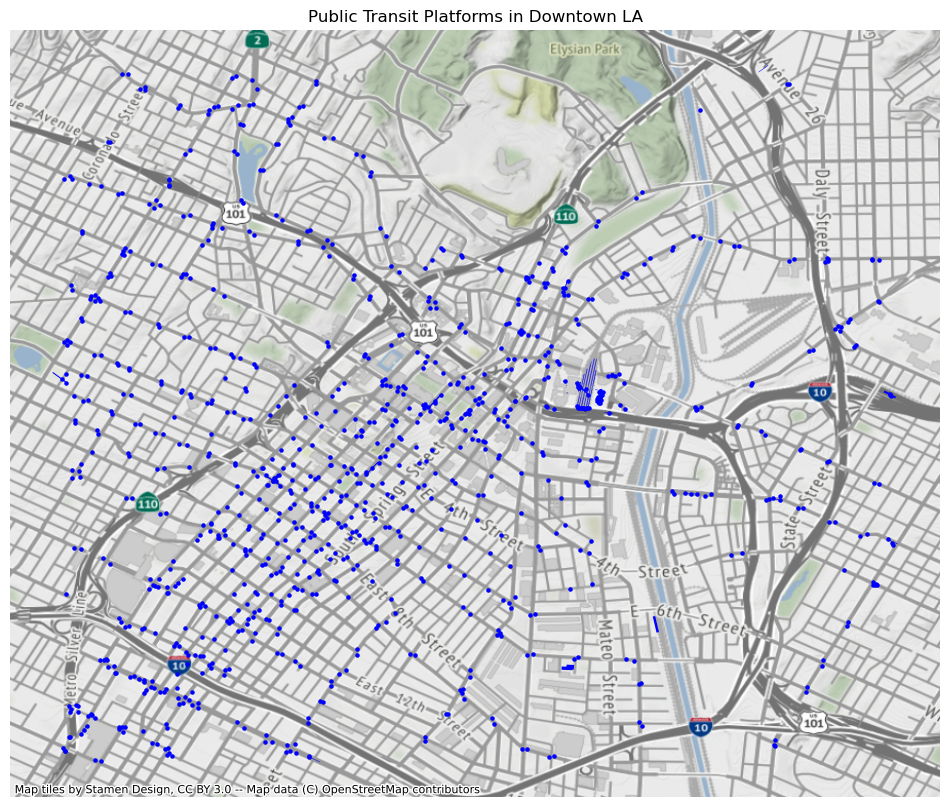

In [114]:
#plot with context of Downtown LA
fig, ax = plt.subplots(figsize=(12,12))
osm.plot(ax=ax, 
        marker='.',
        markersize=20,
        color='blue')
ax.axis('off')
ax.set_title('Public Transit Platforms in Downtown LA')
ctx.add_basemap(ax, crs=4326)

## Can we do it with grocery stores as well?

In [120]:
osm1 = ox.geometries_from_address(address,tags={'shop':True},dist=9000)

In [121]:
#how big is the dataframe
osm1.shape

(1221, 172)

In [122]:
# show me 10 random rows
osm1.sample(10)

brand brand:wikidata    brand:wikipedia  \
element_type osmid                                                          
node         8603241983  Public Storage       Q1156045  en:Public Storage   
             5757277355             NaN            NaN                NaN   
             7958652144             NaN            NaN                NaN   
             5112114621             NaN            NaN                NaN   
             1036344388             NaN            NaN                NaN   
             4121132659             NaN            NaN                NaN   
             4436043427             NaN            NaN                NaN   
             9349813184             NaN            NaN                NaN   
             3869786467             NaN            NaN                NaN   
             4921810797             NaN            NaN                NaN   

                                             name            shop website  \
element_type osmid                                                          
node         8603241983            Public Storage  storage_rental     NaN   
             5757277355          MC's Barber Shop     hairdresser     NaN   
             7958652144                       NaN      car_repair     NaN   
             5112114621                       NaN        copyshop     NaN   
             1036344388            JEM Motor Corp             car     NaN   
             4121132659           LA Jewelry mart         jewelry     NaN   
             4436043427  3rd St Wireless Services    mobile_phone     NaN   
             9349813184     DEN Antique Furniture       furniture     NaN   
             3869786467           Highland Market     convenience     NaN   
             4921810797             Disney Outlet            toys     NaN   

                                            geometry  \
element_type osmid                                     
node         8603241983  POINT (-118.20976 34.09333)   
             5757277355  POINT (-118.29205 34.03012)   
             7958652144  POINT (-118.19882 34.11964)   
             5112114621  POINT (-118.29493 34.06198)   
             1036344388  POINT (-118.31284 34.09846)   
             4121132659  POINT (-118.25583 34.04602)   
             4436043427  POINT (-118.29460 34.06917)   
             9349813184  POINT (-118.30069 34.09512)   
             3869786467  POINT (-118.33937 34.10139)   
             4921810797  POINT (-118.14964 34.00638)   

                                                             opening_hours  \
element_type osmid                                                           
node         8603241983                                                NaN   
             5757277355  Mo-Fr 09:00-19:00; Su 09:00-17:30; Sa 09:30-19:00   
             7958652144                                                NaN   
             5112114621                                                NaN   
             1036344388                                                NaN   
             4121132659                                                NaN   
             4436043427                                        08:00-20:00   
             9349813184                                                NaN   
             3869786467                                                NaN   
             4921810797                                                NaN   

                        wheelchair    addr:city  ... demolished:building  \
element_type osmid                               ...                       
node         8603241983        NaN          NaN  ...                 NaN   
             5757277355        NaN          NaN  ...                 NaN   
             7958652144        NaN          NaN  ...                 NaN   
             5112114621        NaN          NaN  ...                 NaN   
             1036344388        NaN          NaN  ...                 NaN   
             4121132659        NaN        

In [123]:
#see column names
osm1.columns.tolist()

['brand',
 'brand:wikidata',
 'brand:wikipedia',
 'name',
 'shop',
 'website',
 'geometry',
 'opening_hours',
 'wheelchair',
 'addr:city',
 'addr:housenumber',
 'addr:state',
 'addr:street',
 'source',
 'source_ref',
 'shelter',
 'amenity',
 'atm',
 'fuel:diesel',
 'fuel:propane',
 'test_only',
 'addr:postcode',
 'addr:street_direction_prefix',
 'email',
 'phone',
 'tourism',
 'addr:housename',
 'service:bicycle:pump',
 'service:bicycle:repair',
 'service:bicycle:retail',
 'service:bicycle:diy',
 'short_name',
 'operator',
 'addr:country',
 'addr:full',
 'url',
 'craft',
 'clothes',
 'contact:phone',
 'ref',
 'official_name',
 'alt_name',
 'contact:website',
 'payment:amazonpay',
 'payment:cash',
 'payment:credit_cards',
 'payment:paypal',
 'level',
 'alt_name:ko',
 'cuisine',
 'name:en',
 'name:ko',
 'name:zh-Hans',
 'name:zh-Hant',
 'fax',
 'designation',
 'erotic',
 'note',
 'addr:unit',
 'wikidata',
 'wikipedia',
 'camera_rentals',
 'addr:suburb',
 'check_date:currency:XBT',
 'curr

In [124]:
## subset it to keep only desired columns
columns_to_keep1 = ['geometry','name','shop']
osm1 = osm1[columns_to_keep1]
#display subsetted dataframe
osm1.head(10)

geometry  \
element_type osmid                                    
node         86588346   POINT (-118.18289 34.11530)   
             349339593  POINT (-118.32690 34.09818)   
             470868191  POINT (-118.25847 34.04871)   
             470881984  POINT (-118.25096 34.05206)   
             470894217  POINT (-118.26084 34.04559)   
             470912985  POINT (-118.25580 34.04657)   
             543990135  POINT (-118.25580 34.04237)   
             543990352  POINT (-118.25545 34.04170)   
             582073962  POINT (-118.14912 34.12027)   
             582842822  POINT (-118.15891 34.01666)   

                                                name           shop  
element_type osmid                                                   
node         86588346           99 Cents Only Stores  variety_store  
             349339593                     Walgreens        chemist  
             470868191                        Famima    convenience  
             470881984                        Famima    convenience  
             470894217                        Ralphs    supermarket  
             470912985                      7-Eleven    convenience  
             543990135  Gary Leonard Take My Picture          photo  
             543990352         Sara Palacios Gallery          photo  
             582073962                  Ace Hardware   doityourself  
             582842822                      AutoZone      car_parts

In [125]:
#Count number of different shop types
osm1_shop_counts = osm1.value_counts(['shop']).reset_index(name="count")
osm1_shop_counts

shop  count
0         convenience    135
1             clothes    103
2         supermarket     93
3          car_repair     56
4              bakery     44
..                ...    ...
109            spices      1
110        houseplant      1
111  home_goods_store      1
112           outdoor      1
113             knife      1

[114 rows x 2 columns]

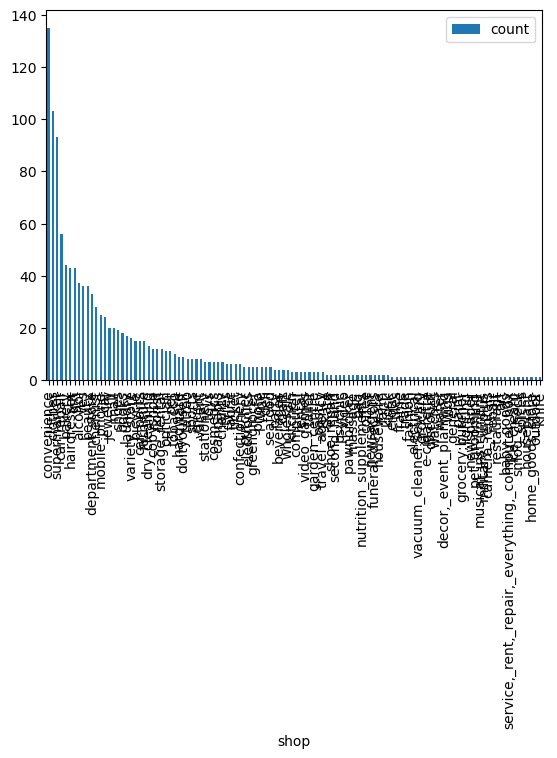

In [126]:
osm1_shop_counts.plot.bar(x='shop');

<AxesSubplot: >

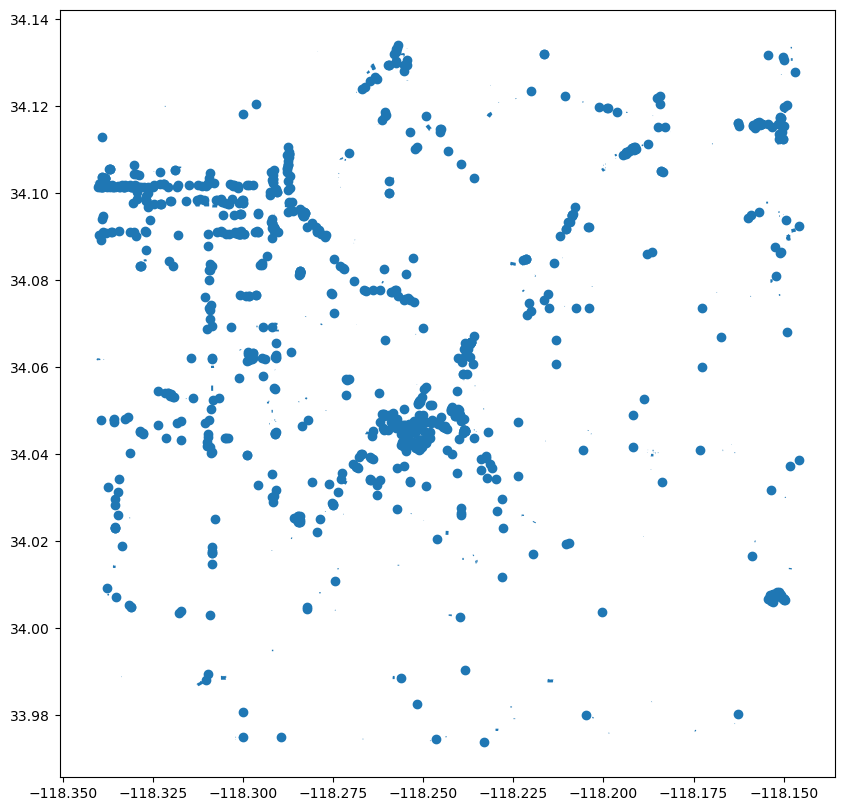

In [127]:
# plot entire dataset
osm1.plot(figsize=(10,10))

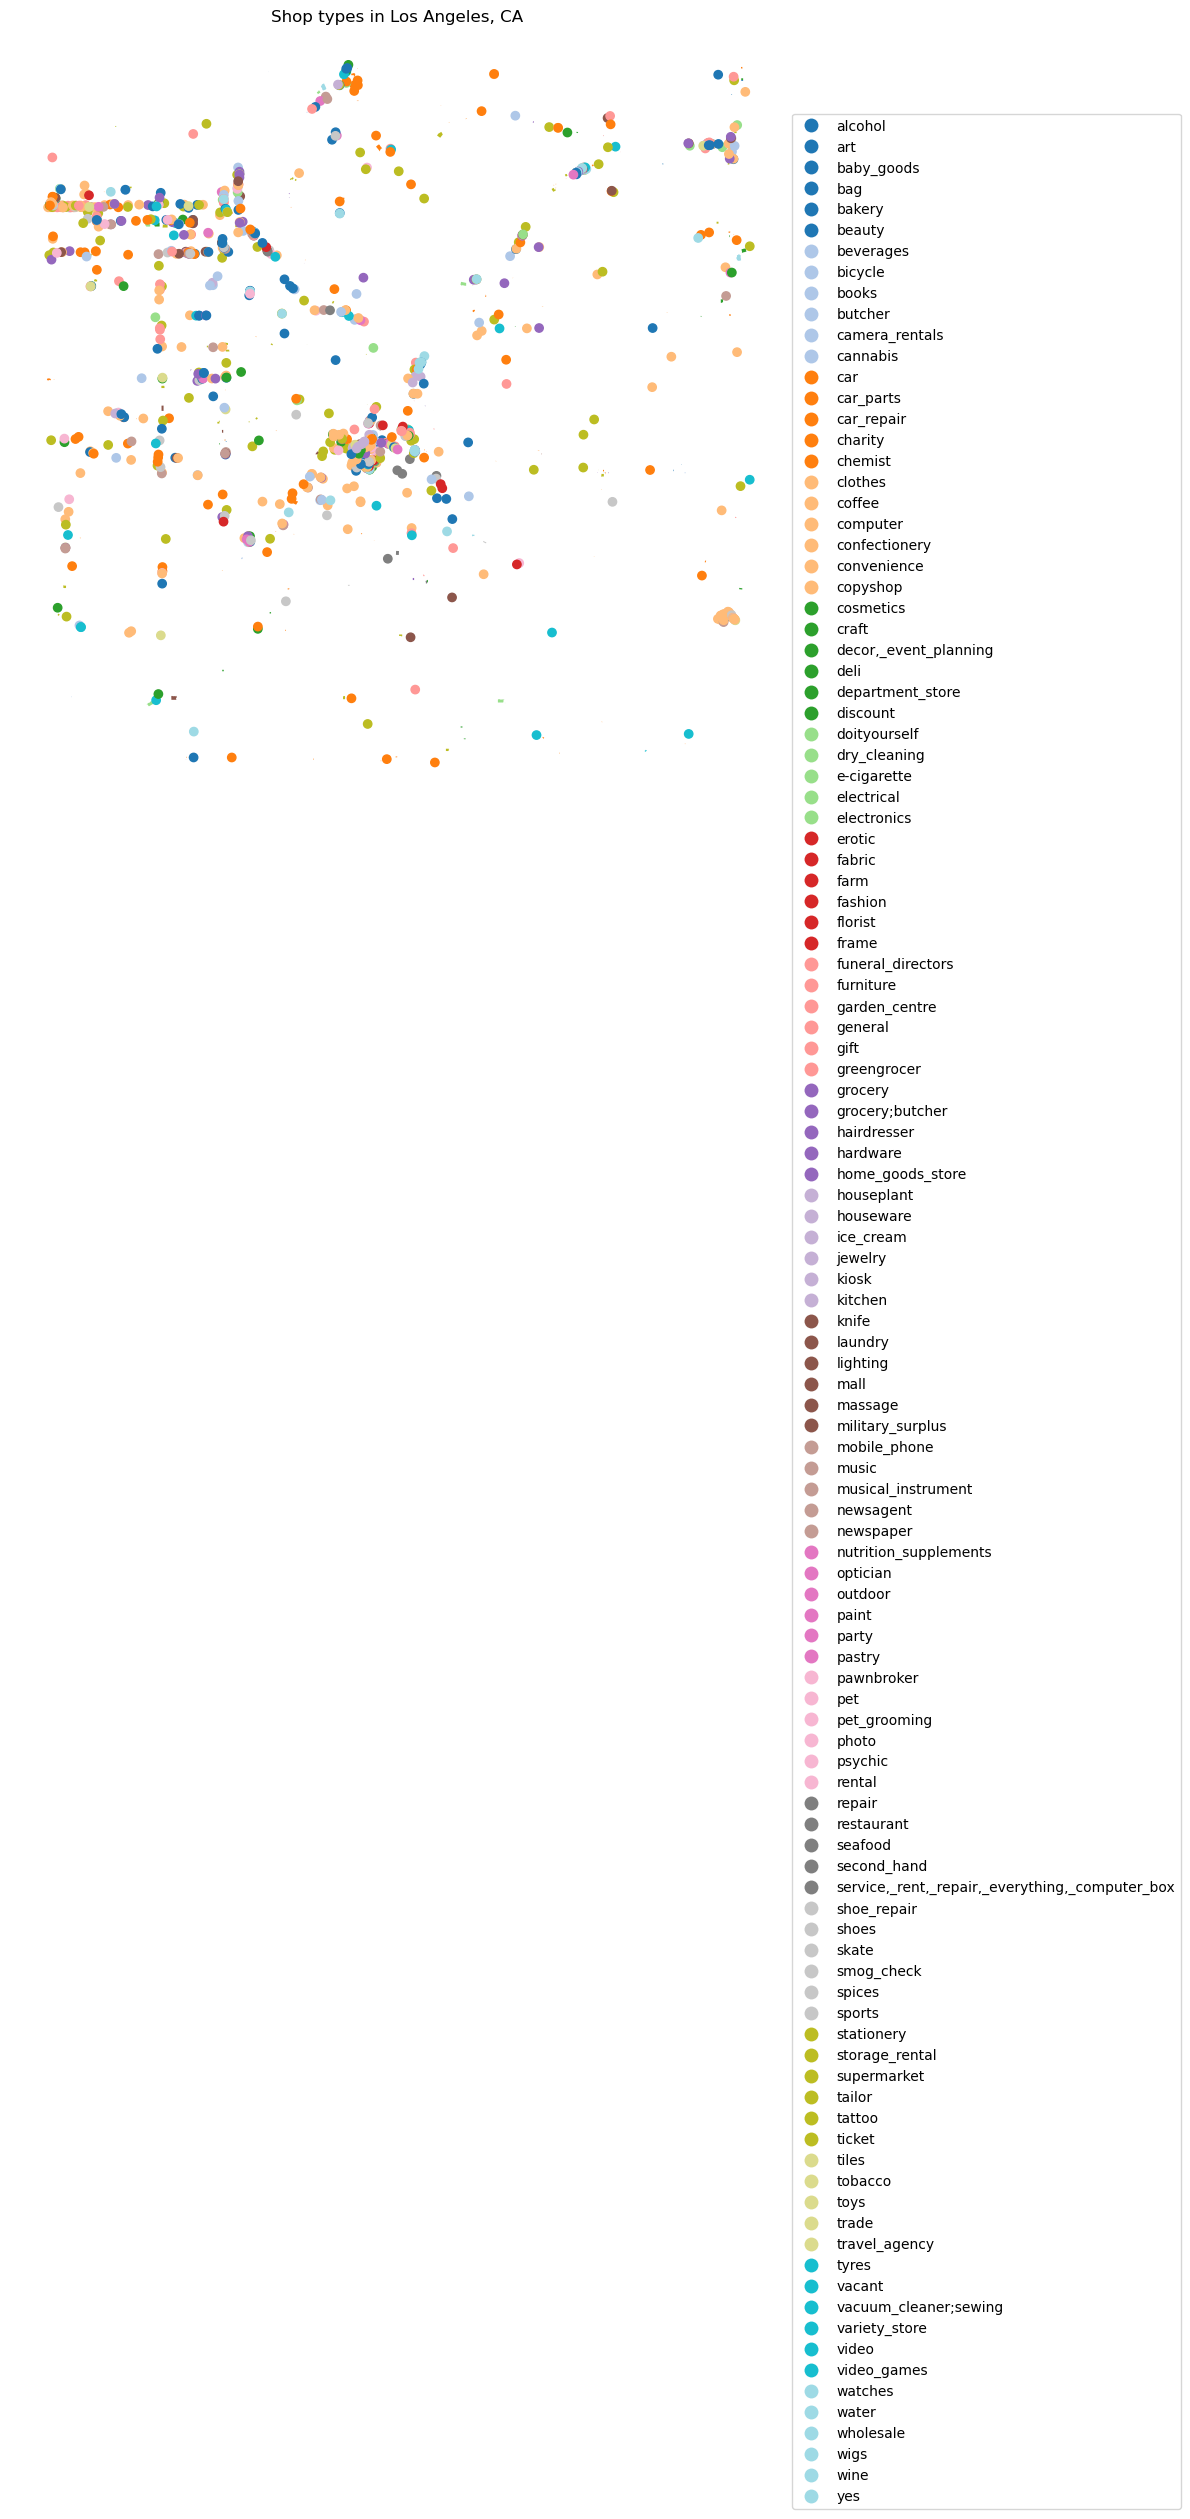

In [128]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
osm1.plot(ax=ax,
         column='shop',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Shop types in ' + address)

# get rid of the axis
ax.axis('off');

In [129]:
# get unique shop types in a list
shoptype = osm1['shop'].unique().tolist()
shoptype

['variety_store',
 'chemist',
 'convenience',
 'supermarket',
 'photo',
 'doityourself',
 'car_parts',
 'bakery',
 'bicycle',
 'clothes',
 'dry_cleaning',
 'video',
 'furniture',
 'laundry',
 'hairdresser',
 'smog_check',
 'mobile_phone',
 'grocery;butcher',
 'gift',
 'toys',
 'confectionery',
 'garden_centre',
 'books',
 'copyshop',
 'vacuum_cleaner;sewing',
 'grocery',
 'newsagent',
 'outdoor',
 'kitchen',
 'tiles',
 'car',
 'hardware',
 'car_repair',
 'storage_rental',
 'video_games',
 'paint',
 'stationery',
 'seafood',
 'shoes',
 'bag',
 'beauty',
 'alcohol',
 'butcher',
 'discount',
 'sports',
 'spices',
 'military_surplus',
 'ticket',
 'department_store',
 'jewelry',
 'optician',
 'electronics',
 'florist',
 'tattoo',
 'newspaper',
 'camera_rentals',
 'vacant',
 'art',
 'deli',
 'pet',
 'yes',
 'ice_cream',
 'tobacco',
 'wine',
 'pawnbroker',
 'cosmetics',
 'music',
 'tyres',
 'craft',
 'greengrocer',
 'beverages',
 'fabric',
 'travel_agency',
 'decor,_event_planning',
 'service

In [130]:
#subset the list for only grocery stores
supermarket = osm1.loc[(osm1['shop'] == 'supermarket')]
supermarket

geometry  \
element_type osmid                                                          
node         470894217                        POINT (-118.26084 34.04559)   
             757327034                        POINT (-118.27550 34.07692)   
             757759930                        POINT (-118.18650 34.08654)   
             902322532                        POINT (-118.28792 34.10884)   
             902322555                        POINT (-118.29265 34.10018)   
...                                                                   ...   
way          428507728  POLYGON ((-118.28434 34.05196, -118.28434 34.0...   
             429013525  POLYGON ((-118.25830 34.10328, -118.25830 34.1...   
             429312772  POLYGON ((-118.18680 34.04001, -118.18680 34.0...   
             455750760  POLYGON ((-118.22997 33.97684, -118.22917 33.9...   
             471626079  POLYGON ((-118.16275 34.11538, -118.16274 34.1...   

                                          name         shop  
element_type osmid                                           
node         470894217                  Ralphs  supermarket  
             757327034  El C Lollo Meat Market  supermarket  
             757759930            Dollar Store  supermarket  
             902322532              Albertsons  supermarket  
             902322555       Jon's Marketplace  supermarket  
...                                        ...          ...  
way          428507728             Food 4 Less  supermarket  
             429013525      Whole Foods Market  supermarket  
             429312772        Superior Grocers  supermarket  
             455750760             Food 4 Less  supermarket  
             471626079            Trader Joe's  supermarket  

[93 rows x 3 columns]

In [131]:
some_values = ['supermarket' , 'convenience']
grocerystores = osm1.loc[osm1['shop'].isin(some_values)]

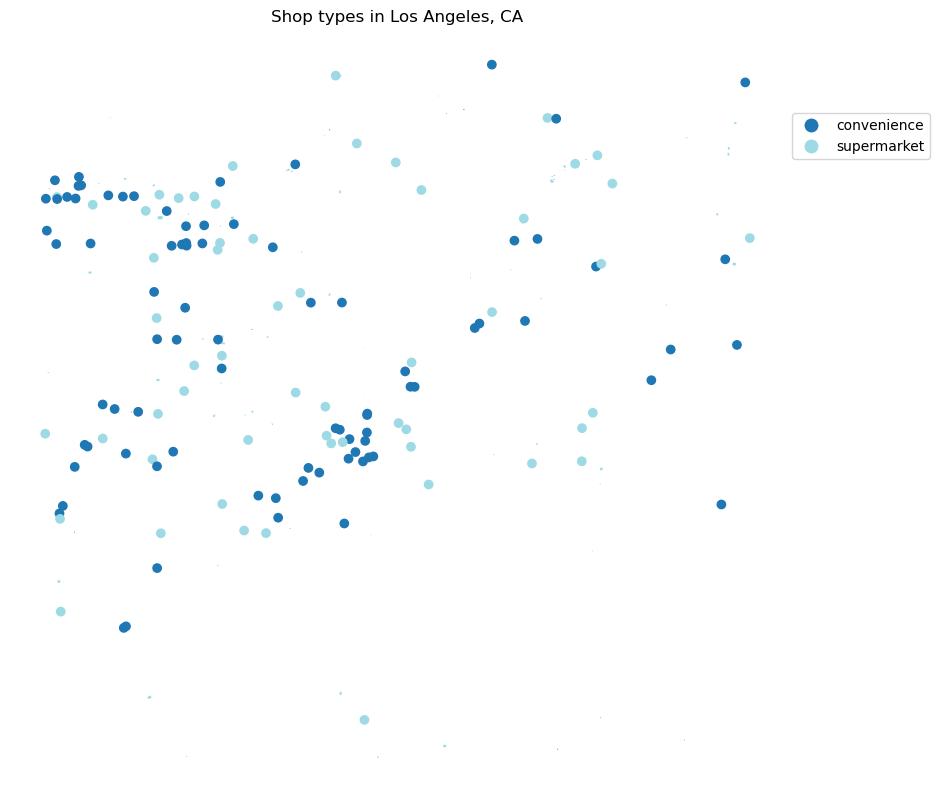

In [132]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
grocerystores.plot(ax=ax,
         column='shop',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Shop types in ' + address)

# get rid of the axis
ax.axis('off');

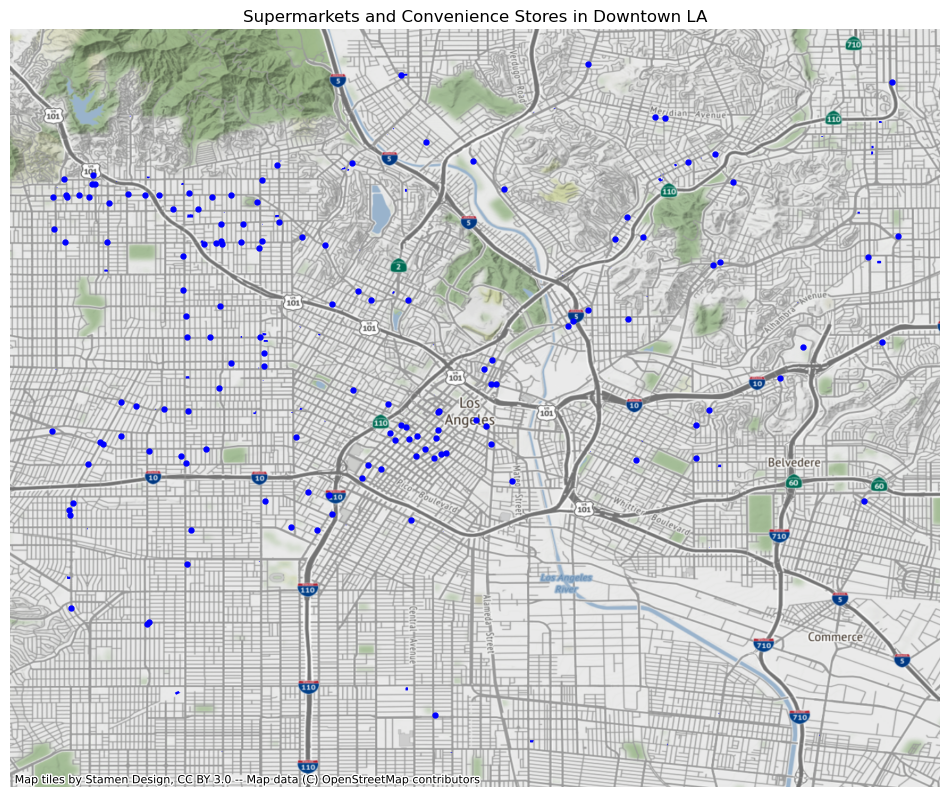

In [133]:
#plot with context of Downtown LA
fig, ax = plt.subplots(figsize=(12,12))
grocerystores.plot(ax=ax, 
        marker='.',
        markersize=50,
        color='blue')
ax.axis('off')
ax.set_title('Supermarkets and Convenience Stores in Downtown LA')
ctx.add_basemap(ax, crs=4326)

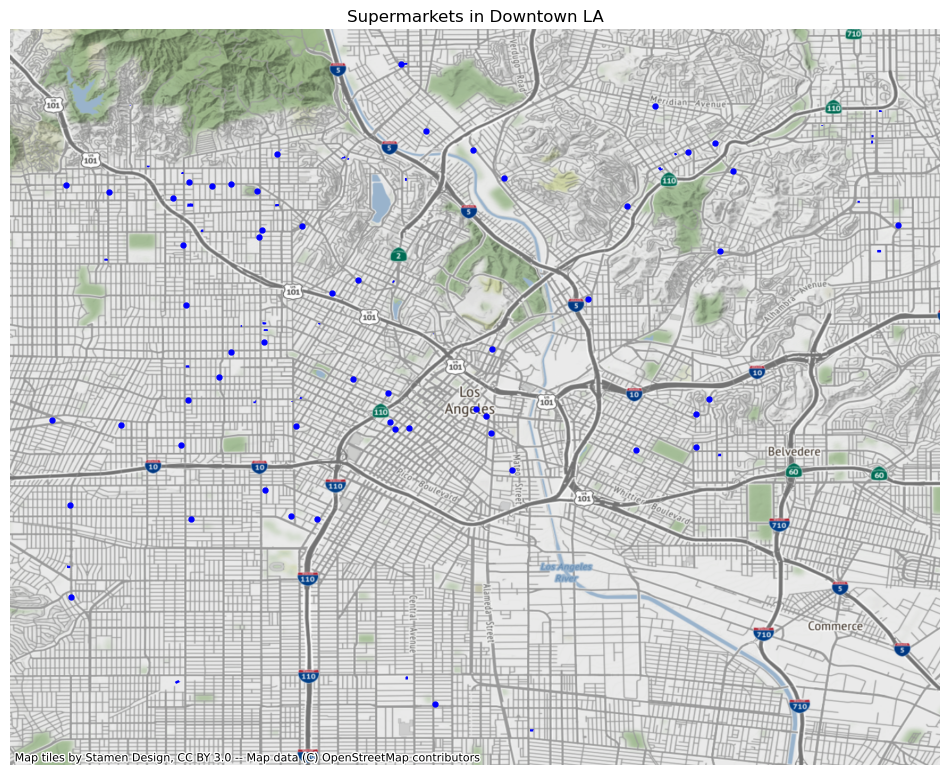

In [135]:
#plot with context of Downtown LA
fig, ax = plt.subplots(figsize=(12,12))
supermarket.plot(ax=ax, 
        marker='.',
        markersize=50,
        color='blue')
ax.axis('off')
ax.set_title('Supermarkets in Downtown LA')
ctx.add_basemap(ax, crs=4326)